In [8]:
# Install the Kaggle package to enable dataset downloading from Kaggle
!pip install kaggle

In [10]:
# Install the MediaPipe package, which provides tools for hand detection and other ML-based features
!pip install mediapipe

In [12]:
# Import TensorFlow for building and training the neural network
import tensorflow as tf

# Import Keras layers and models modules for constructing the CNN architecture
from tensorflow.keras import layers, models

# Import utility to load image datasets directly from directories
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Import Matplotlib for plotting and visualizing data or results
import matplotlib.pyplot as plt

# Import NumPy for numerical operations and array manipulation
import numpy as np

# Import OpenCV for image processing tasks
import cv2

# Import train_test_split from sklearn to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split 

# Import os module for interacting with the operating system (e.g., file and directory operations)
import os

In [14]:
# # Execute a system command to download and unzip the Nepali Sign Language dataset from Kaggle into the './data' directory
os.system("kaggle datasets download -d biratpoudelrocks/nepali-sign-language-character-dataset -p ./data --unzip")

# Define the path variable to point to the directory where the dataset is stored
path = "./data"

# Print the path to confirm where the dataset files are located
print("Path to dataset files:", path)

Path to dataset files: ./data


In [16]:
# Print a list of files and directories in the dataset path to verify the contents
print("Files in dataset path:", os.listdir(path))

Files in dataset path: ['NSL']


In [18]:
# Define the dataset_path variable to point to the './data' directory where the dataset is stored
dataset_path = './data'

# Check if the dataset directory exists using os.path.exists()
if os.path.exists(dataset_path):
    # Print a confirmation message if the directory is found
    print("Dataset is installed!")
else:
    # Print an error message if the directory is not found
    print("Dataset is not found!")

Dataset is installed!


In [20]:
# Define the DATASET_PATH variable to point to the specific NSL dataset folder within './data'
DATASET_PATH = "./data/NSL"  # Adjust if needed

# Print a message to indicate that the dataset structure is being checked
print("Checking dataset structure...")

# Iterate through the directory tree using os.walk, returning root directory, subdirectories, and files
for root, dirs, files in os.walk(DATASET_PATH):
    # Print the current folder path and the number of files (images) it contains
    print(f"Folder: {root}, Contains: {len(files)} images")

Checking dataset structure...
Folder: ./data/NSL, Contains: 2 images
Folder: ./data/NSL\Plain Background, Contains: 0 images
Folder: ./data/NSL\Plain Background\0, Contains: 1000 images
Folder: ./data/NSL\Plain Background\1, Contains: 1000 images
Folder: ./data/NSL\Plain Background\10, Contains: 1000 images
Folder: ./data/NSL\Plain Background\11, Contains: 1000 images
Folder: ./data/NSL\Plain Background\12, Contains: 1000 images
Folder: ./data/NSL\Plain Background\13, Contains: 1000 images
Folder: ./data/NSL\Plain Background\14, Contains: 1000 images
Folder: ./data/NSL\Plain Background\15, Contains: 1000 images
Folder: ./data/NSL\Plain Background\16, Contains: 1000 images
Folder: ./data/NSL\Plain Background\17, Contains: 1000 images
Folder: ./data/NSL\Plain Background\18, Contains: 1000 images
Folder: ./data/NSL\Plain Background\19, Contains: 1000 images
Folder: ./data/NSL\Plain Background\2, Contains: 1000 images
Folder: ./data/NSL\Plain Background\20, Contains: 1000 images
Folder: ./

In [22]:
# Define the target image size (64x64 pixels) for resizing all images
IMG_SIZE = 64  # setting the image size 

# Set the path to the Nepali Sign Language dataset directory
DATASET_PATH = './data/NSL'  # path to dataset

# Create a dictionary mapping folder names (labels) from "Plain Background" to integer indices
label_map = {label: idx for idx, label in enumerate(sorted(os.listdir(os.path.join(DATASET_PATH, "Plain Background"))))}

# Initialize an empty list to store image data and their corresponding labels
data = []

# Iterate over both "Plain Background" and "Random Background" categories to process images
for category in ["Plain Background", "Random Background"]:
    # Print a message to indicate which category is being processed
    print(f"Processing {category} images...")
    # Construct the full path to the current category directory
    category_path = os.path.join(DATASET_PATH, category)

    # Iterate through each label folder in the category, sorted alphabetically
    for label in sorted(os.listdir(category_path)):
        # Construct the full path to the current label folder
        label_folder = os.path.join(category_path, label)

        # Skip if the current path is not a directory
        if not os.path.isdir(label_folder):  # Fix: Check `label_folder` instead of `category_path`
            continue

        # Iterate through each file in the label folder
        for img_name in os.listdir(label_folder):
            # Construct the full path to the current image file
            img_path = os.path.join(label_folder, img_name)

            # Check if the file is an image with a supported extension (png, jpg, or jpeg)
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Read the image in grayscale mode using OpenCV
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # converting into grayscale image
                # Resize the image to the defined IMG_SIZE (64x64)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # resizing image shape
                # Append the image and its mapped integer label to the data list
                data.append([img, label_map[label]])  # Use mapped integer label

# Unzip the data list into two separate tuples: X (images) and y (labels)
X, y = zip(*data)

# Convert X to a NumPy array, reshape it to (-1, 64, 64, 1) for CNN input, and normalize pixel values to 0-1
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0

# Convert y to a NumPy array of integers for use as labels
y = np.array(y, dtype=np.int64)  # Ensure y is an integer array

# Split the dataset into training (80%) and testing (20%) sets, with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Processing Plain Background images...
Processing Random Background images...


In [24]:
# viewing the length of X train and X test
len(X_train), len(X_test)

(43200, 10800)

In [26]:
# Import specific layers from TensorFlow Keras for building the CNN model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Import the Sequential model class from TensorFlow Keras to create a linear stack of layers
from tensorflow.keras.models import Sequential

# Import the Input layer from TensorFlow Keras to explicitly define the input shape of the model
from tensorflow.keras.layers import Input

In [28]:
## Create a Sequential model to build a CNN for training
model = Sequential([
    # Define the input layer with the shape (IMG_SIZE, IMG_SIZE, 1) for grayscale images
    Input(shape=(IMG_SIZE, IMG_SIZE, 1)),  # Define input shape separately
    # Add a convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
    Conv2D(32, (3,3), activation='relu'),  # Convolutional layer
    # Add a max pooling layer with 2x2 pool size to reduce spatial dimensions
    MaxPooling2D(2,2),                     # Maxpool Layer
    # Add a second convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
    Conv2D(64, (3,3), activation='relu'),  # Convolutional Layer
    # Add a second max pooling layer with 2x2 pool size
    MaxPooling2D(2,2),                     # Maxpool Layer
    # Add a third convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
    Conv2D(64, (3,3), activation='relu'),  # Convolutional Layer
    # Add a third max pooling layer with 2x2 pool size
    MaxPooling2D(2,2),                     # Maxpool Layer
    # Flatten the 3D feature maps into a 1D vector for the dense layers
    Flatten(),                             # Flatten Layer
    # Add a fully connected (dense) layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),         # Neural Network with 128 neurons
    # Add an output layer with a number of neurons equal to unique labels, using softmax for classification
    Dense(len(np.unique(y_train)), activation='softmax')   # applying the softmax function
])

# Compile the model with the Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs using training data and validate with test data, storing training history
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Save the trained model to a file named "nsl_sign_language_model.keras"
model.save("nsl_sign_language_model.keras")

# Print a confirmation message after training and saving the model
print("Model training complete and saved!")

Epoch 1/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 49s 34ms/step - accuracy: 0.5381 - loss: 1.5759 - val_accuracy: 0.9320 - val_loss: 0.2251
Epoch 2/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 44s 32ms/step - accuracy: 0.9561 - loss: 0.1412 - val_accuracy: 0.9721 - val_loss: 0.0915
Epoch 3/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 45s 33ms/step - accuracy: 0.9802 - loss: 0.0620 - val_accuracy: 0.9760 - val_loss: 0.0730
Epoch 4/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.9850 - loss: 0.0460 - val_accuracy: 0.9845 - val_loss: 0.0522
Epoch 5/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 44s 32ms/step - accuracy: 0.9887 - loss: 0.0355 - val_accuracy: 0.9877 - val_loss: 0.0408
Epoch 6/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.9917 - loss: 0.0244 - val_accuracy: 0.9825 - val_loss: 0.0662
Epoch 7/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 44s 32ms/step - accuracy: 0.9939 - loss: 0.0205 - val_accuracy: 0.9859 - val_loss: 0.0530
Epoch 8/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.9946 -

In [30]:
# viewing the number of trainable parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,066,286 (4.07 MB)

 Trainable params: 355,428 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 710,858 (2.71 MB)

In [32]:

# Import precision_score and recall_score from sklearn.metrics for evaluation metrics
from sklearn.metrics import precision_score, recall_score

# Evaluate the trained model on the test data, returning the loss and accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test accuracy as a percentage with 4 decimal places
print(f"Test Accuracy: {test_acc*100:.4f}")

# Make predictions on the test set to get predicted class labels
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate precision score (macro average for multi-class)
precision = precision_score(y_test, y_pred, average='macro')

# Calculate recall score (macro average for multi-class)
recall = recall_score(y_test, y_pred, average='macro')

# Print precision and recall as percentages with 4 decimal places
print(f"Test Precision: {precision*100:.4f}")
print(f"Test Recall: {recall*100:.4f}")

338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9923 - loss: 0.0305
Test Accuracy: 99.1019
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Test Precision: 99.1183
Test Recall: 99.1249


338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
The predicted label is 31


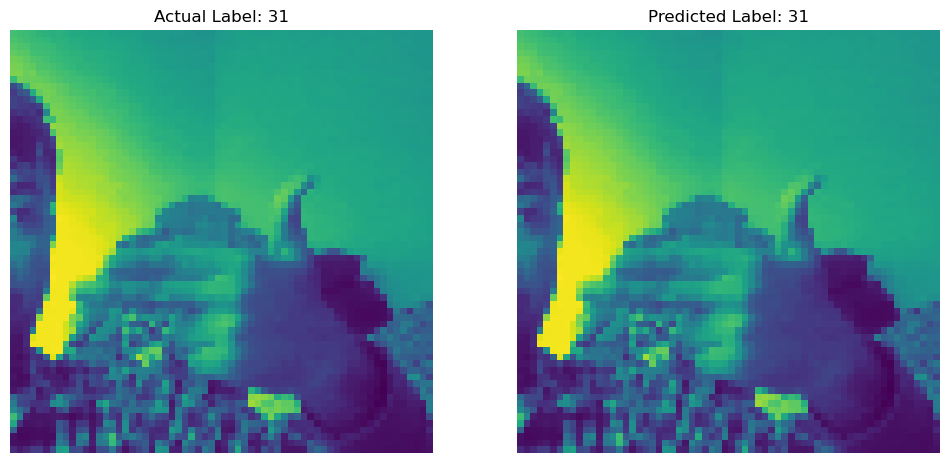

In [34]:

# Define an index to select a specific test image (set to 14 here)
index = 14

# Predict the class probabilities for all test images and select the one at the specified index
y_pred1 = model.predict(X_test)[index]

# Get the predicted class label by finding the index with the maximum probability
y_pred1_classes = np.argmax(y_pred1)  # Get the label with max logit

# Print the predicted label for the selected image
print("The predicted label is", y_pred1_classes)

# Retrieve the image at the specified index from the test set
image = X_test[index]

# Retrieve the actual label for the selected image from y_test
label = y_test[index]  # Actual label from y_test

# Convert the image from normalized float32 (0-1 range) back to uint8 (0-255 range) for display
image = (image * 255).astype(np.uint8)  # Assuming image is in float32 in the range [0, 1]

# Create a figure with two subplots side-by-side for comparing actual and predicted labels
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the image in the first subplot with the actual label as the title
ax[0].imshow(image)
ax[0].set_title(f'Actual Label: {label}')
ax[0].axis('off')  # Hide the axes for a cleaner display

# Display the same image in the second subplot with the predicted label as the title
ax[1].imshow(image)
ax[1].set_title(f'Predicted Label: {y_pred1_classes}')
ax[1].axis('off')  # Hide the axes for a cleaner display

# Show the plot with both subplots
plt.show()

338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


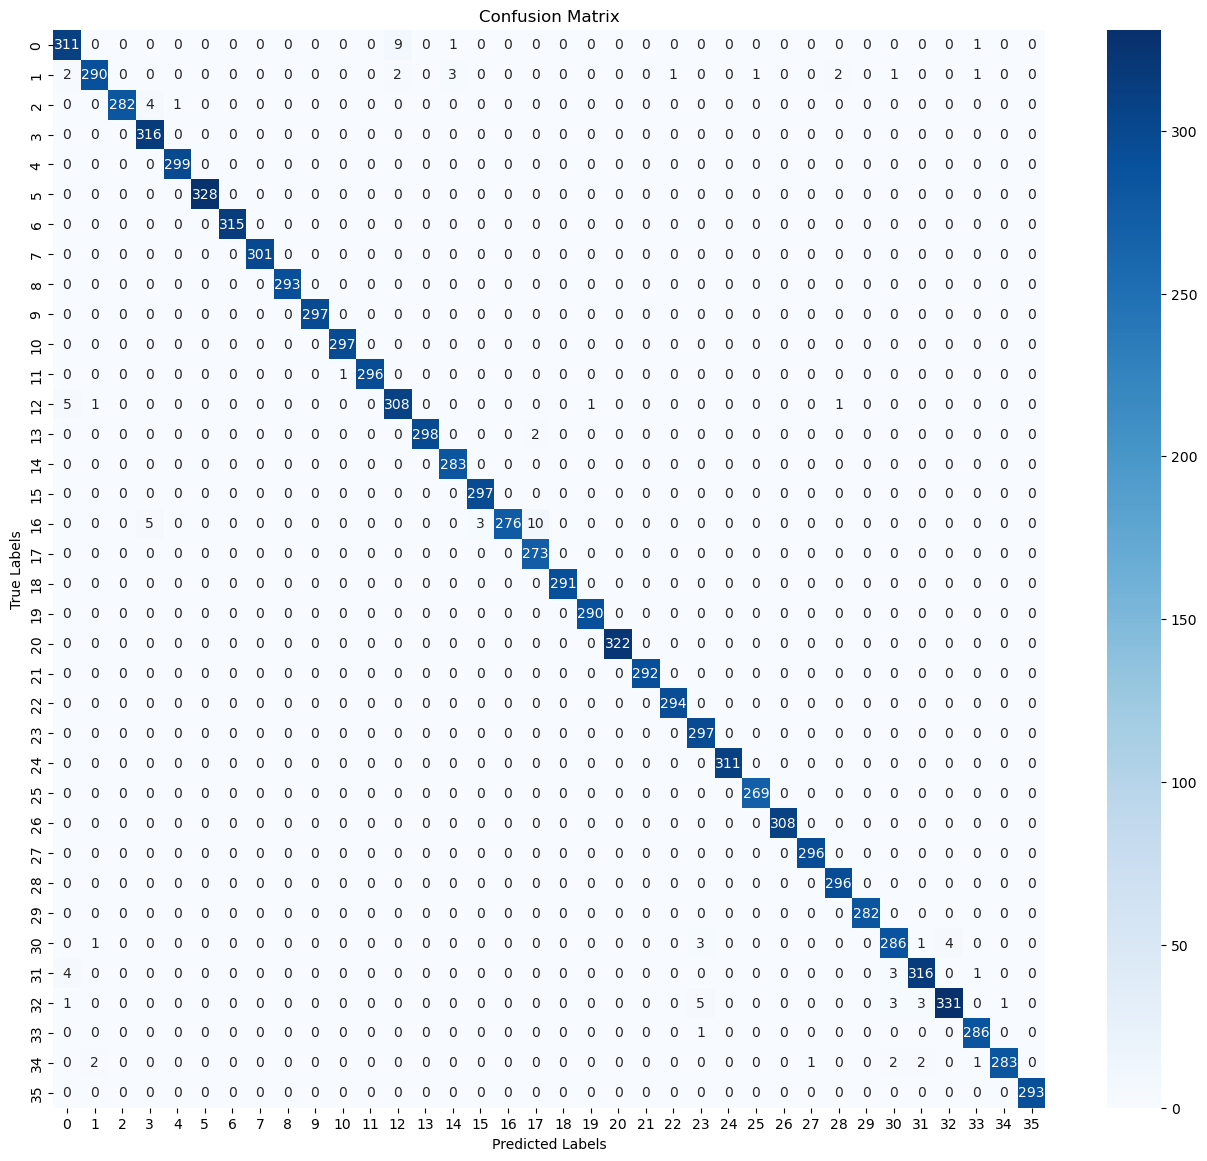

In [36]:
# Import Seaborn library for enhanced visualization, particularly for plotting the confusion matrix
import seaborn as sns

# Get the predicted probabilities for all test images using the trained model
y_pred = model.predict(X_test)  # Assuming 'model' is your trained model

# Convert the predicted probabilities to class indices by selecting the index with the highest probability
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

# Compute the confusion matrix using TensorFlow, comparing true labels (y_test) with predicted labels
cm = tf.math.confusion_matrix(y_test, y_pred_classes, num_classes=len(np.unique(y_test)))

# Convert the TensorFlow tensor confusion matrix to a NumPy array for easier visualization
cm = cm.numpy()

# Create a new figure for plotting the confusion matrix with a specified size (16x14 inches)
plt.figure(figsize=(16, 14))

# Plot the confusion matrix as a heatmap using Seaborn, with annotations, integer formatting, and a blue color scheme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Label the x-axis as "Predicted Labels" to indicate the model's predictions
plt.xlabel("Predicted Labels")

# Label the y-axis as "True Labels" to indicate the actual ground truth labels
plt.ylabel("True Labels")

# Set the title of the plot to "Confusion Matrix" for clarity
plt.title("Confusion Matrix")

# Display the confusion matrix plot
plt.show()

Text(0.5, 0, 'Epoch')

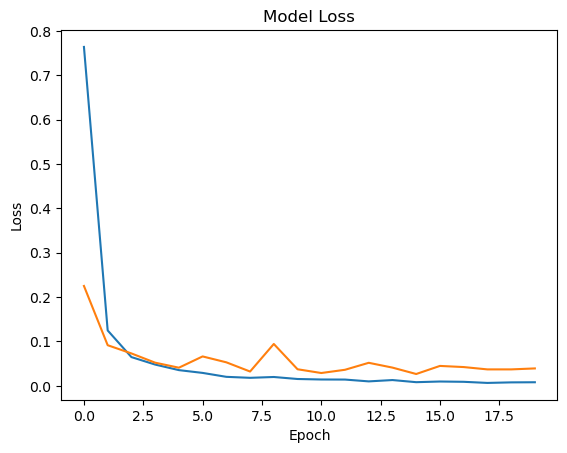

In [38]:

# Plot the training loss values stored in the history object from model training
plt.plot(history.history['loss'])

# Plot the validation loss values stored in the history object from model training
plt.plot(history.history['val_loss'])

# Set the title of the plot to "Model Loss" to describe what is being visualized
plt.title('Model Loss')

# Label the y-axis as "Loss" to indicate the metric being plotted
plt.ylabel('Loss')

# Label the x-axis as "Epoch" to indicate the training iterations
plt.xlabel('Epoch')

# Add a legend to differentiate between training and validation loss curves, positioned

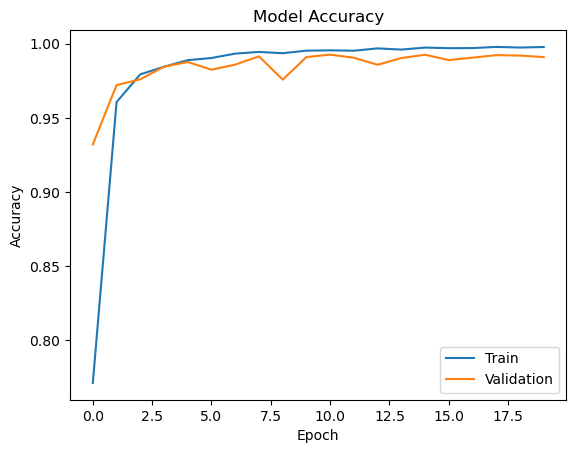

In [40]:
# Plot the training accuracy values stored in the history object from model training
plt.plot(history.history['accuracy'])

# Plot the validation accuracy values stored in the history object from model training
plt.plot(history.history['val_accuracy'])

# Set the title of the plot to "Model Accuracy" to describe what is being visualized
plt.title('Model Accuracy')

# Label the y-axis as "Accuracy" to indicate the metric being plotted
plt.ylabel('Accuracy')

# Label the x-axis as "Epoch" to indicate the training iterations
plt.xlabel('Epoch')

# Add a legend to differentiate between training and validation accuracy curves, positioned in the lower right
plt.legend(['Train', 'Validation'], loc='lower right')

# Display the plot showing the accuracy curves over epochs
plt.show()

In [35]:
# loading the saved model
loaded_model = tf.keras.models.load_model("nsl_sign_language_model.keras")

In [42]:
# Import MediaPipe for hand detection and tracking
import mediapipe as mp

# Import PIL modules for rendering text on images
from PIL import ImageFont, ImageDraw, Image

# Load the previously trained model from the saved file
model = tf.keras.models.load_model("nsl_sign_language_model.keras")

# Define the image size constant used during training (64x64 pixels)
IMG_SIZE = 64  # The image size used during training

# Define a dictionary mapping class indices to Nepali letters
nepali_letters = {
    0: "क", 1: "ख", 2: "ग", 3: "घ", 4: "ङ",
    5: "च", 6: "छ", 7: "ज", 8: "झ", 9: "ञ",
    10: "ट", 11: "ठ", 12: "ड", 13: "ढ", 14: "ण",
    15: "त", 16: "थ", 17: "द", 18: "ध", 19: "न",
    20: "प", 21: "फ", 22: "ब", 23: "भ", 24: "म",
    25: "य", 26: "र", 27: "ल", 28: "व", 29: "श",
    30: "ष", 31: "स", 32: "ह", 33: "क्ष", 34: "त्र", 35: "ज्ञ"
}

# Load an English font (Arial) with a size of 32 for text rendering
english_font = ImageFont.truetype("arial.ttf", 32)  # You can replace with any available font

# Specify the file path to a Nepali font (Kalimati Regular) and load it with a size of 32
nepali_font_path = r"D:\Kalimati Regular\Kalimati Regular.otf"  # Update with the correct font path
nepali_font = ImageFont.truetype(nepali_font_path, 32)

# Initialize the MediaPipe Hands module for hand detection
mp_hands = mp.solutions.hands

# Create a Hands object with real-time detection settings: single hand, minimum confidence of 0.5
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)

# Open the default webcam (index 0) for video capture
cap = cv2.VideoCapture(0)

# Check if the webcam opened successfully; exit if it fails
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Print a message to confirm the webcam is open and video capture is starting
print("Webcam is open. Starting video capture...")

# Begin an infinite loop for real-time prediction and display
while True:
    # Capture a frame from the webcam
    ret, frame = cap.read()

    # Check if the frame was captured successfully; break the loop if it fails
    if not ret:
        print("Error: Failed to capture image.")
        break

    # Convert the frame from BGR (OpenCV default) to RGB for MediaPipe processing
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the RGB frame with MediaPipe Hands to detect hand landmarks
    results = hands.process(rgb_frame)

    # Initialize a flag to indicate if a hand is detected
    hand_detected = False

    # Set a default detected letter as "?" when no hand is detected
    detected_letter = "?"  # Default in case of no detection

    # Check if any hand landmarks are detected
    if results.multi_hand_landmarks:
        # Set the hand_detected flag to True since a hand is found
        hand_detected = True

        # Iterate over detected hand landmarks (only one hand due to max_num_hands=1)
        for hand_landmarks in results.multi_hand_landmarks:
            # Calculate the minimum x-coordinate of the hand bounding box
            x_min = int(min([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1])
            # Calculate the minimum y-coordinate of the hand bounding box
            y_min = int(min([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0])
            # Calculate the maximum x-coordinate of the hand bounding box
            x_max = int(max([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1])
            # Calculate the maximum y-coordinate of the hand bounding box
            y_max = int(max([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0])

            # Draw a green rectangle around the detected hand on the frame
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

            # Crop the hand region from the frame using the bounding box coordinates
            hand_crop = frame[y_min:y_max, x_min:x_max]

            # Check if the cropped region is not empty before processing
            if hand_crop.size != 0:  # Ensure the crop is not empty
                # Convert the cropped hand region to grayscale
                gray = cv2.cvtColor(hand_crop, cv2.COLOR_BGR2GRAY)
                # Resize the grayscale image to the training size (64x64) and normalize to 0-1
                resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE)) / 255.0  # Normalize the image
                # Expand dimensions to match model input shape: (1, 64, 64, 1)
                input_img = np.expand_dims(resized, axis=(0, -1))  # Add batch and channel dimensions

                # Predict the class probabilities using the trained model, suppressing verbose output
                predictions = model.predict(input_img, verbose=0)  # Suppress prediction logs
                # Get the predicted class by finding the index with the highest probability
                predicted_class = np.argmax(predictions)
                # Get the confidence score as the maximum probability
                confidence = np.max(predictions)  # Get the confidence score

                # Map the predicted class index to the corresponding Nepali letter, defaulting to "?" if not found
                detected_letter = nepali_letters.get(predicted_class, "?")

                # Print debugging information: raw predictions, predicted class, and confidence
                print("Raw Predictions:", predictions)
                print("Predicted Class:", predicted_class)
                print("Confidence:", confidence)

    # Convert the OpenCV frame to a PIL image for text rendering
    img_pil = Image.fromarray(frame)

    # Create a drawing object to add text to the PIL image
    draw = ImageDraw.Draw(img_pil)

    # Draw the English text "Detected Sign:" at position (10, 50) in blue
    draw.text((10, 50), "Detected Sign:", font=english_font, fill=(0, 0, 255))

    # Draw the detected Nepali letter at position (250, 50) in green
    draw.text((250, 50), detected_letter, font=nepali_font, fill=(0, 255, 0))

    # If no hand is detected, draw a message in red at position (10, 100)
    if not hand_detected:
        draw.text((10, 100), "No hand detected", font=english_font, fill=(255, 0, 0))

    # Convert the PIL image back to an OpenCV-compatible NumPy array
    frame = np.array(img_pil)

    # Display the frame with annotations in a window titled "Real-Time Sign Language Recognition"
    cv2.imshow("Real-Time Sign Language Recognition", frame)

    # Wait for a key press (1ms delay) and check if 'q' is pressed to exit
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        # Print an exit message and break the loop if 'q' is pressed
        print("Exiting... Pressed 'q'.")
        break

# Release the webcam resource to free it up
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()

Webcam is open. Starting video capture...
Raw Predictions: [[1.41653636e-05 1.30313069e-01 1.97003855e-15 1.04232825e-14
  5.24656396e-20 9.61291302e-19 3.32939058e-12 1.60983575e-18
  7.80649874e-15 5.89306668e-20 1.01434730e-13 5.92011588e-07
  7.42653697e-07 6.83215452e-16 1.46575417e-12 2.31796902e-14
  3.39068036e-04 3.54953256e-14 1.05839478e-11 2.53907183e-05
  1.00649062e-08 4.03911574e-04 8.67744833e-02 8.77919005e-12
  2.49647576e-17 5.12083364e-17 5.51448356e-20 1.96749648e-11
  9.26009417e-02 4.97017938e-09 6.42397627e-02 2.79562755e-07
  5.76073580e-06 8.03228892e-15 6.25281811e-01 3.87383848e-16]]
Predicted Class: 34
Confidence: 0.6252818
Raw Predictions: [[3.75470132e-01 6.23137951e-01 3.38355253e-23 5.46714157e-27
  7.99318674e-26 5.26614714e-20 1.33189962e-16 2.52284586e-18
  2.99001492e-12 1.28126299e-21 7.93206375e-13 4.66640073e-13
  2.10561367e-07 6.47694721e-14 1.71429579e-15 1.81124231e-17
  1.13784592e-13 7.77808140e-20 1.87673033e-18 1.03379016e-13
  2.45979638